# 3. 앱스토어 데이터
다음의 app_store.csv 데이터는 신 사업으로 어플 추천 시스템을 개발하는 스타트업인 G사가 다양한 어플에 대한 특성 정보와 사용자 평가 정보를 확보하여 정리한 데이터이다. <br> 
※ Rating은 평점, Reviews는 리뷰의 수, Installs는 설치된 수, Size는 앱의 용량, 그리고 Price는 앱의 가격이다.<br>




## 3-1 Rating 변수 상관관계 분석
Rating 변수와 상관관계를 분석할 수 있는 변수를 찾고, 그들이 어떠한 관계를 갖는지 이유와 함께 설명해주세요. (시각 자료 및 코드를 제외한 답안의 길이는 한 페이지 이내로 제한해주세요.)


In [1]:
import pandas as pd
import re
df = pd.read_csv("app_store.csv", encoding="utf-8-sig")

In [2]:
df.head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price
0,123 Kids Fun MUSIC - Kids Music Educational Games,GAME_MUSIC,4.083333,36,"1,000+",22M,$1.99
1,LetterSchool - Block Letters,GAME_EDUCATIONAL,4.181092,751,"10,000+",79M,$6.99
2,Tynker for Schools,GAME_EDUCATIONAL,4.000000,33,"1,000+",33M,$4.99
3,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.500000,22,"1,000+",44M,$5.99
4,Toddler Sing and Play 2 Pro,GAME_MUSIC,4.065041,246,"10,000+",20M,$1.99
5,Letter Quiz: Alphabet Aquarium,EDUCATION,4.151515,66,"5,000+",44M,$1.99
6,Green Eggs and Ham - Dr. Seuss,BOOKS_AND_REFERENCE,4.656376,745,"10,000+",14M,$3.99
7,Meme Generator PRO,ENTERTAINMENT,4.630876,4042,"100,000+",58M,$2.99
8,Construction Simulator 2014,GAME_SIMULATION,4.339837,104091,"1,000,000+",19M,$0.99
9,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.798857,13120,"100,000+",43M,$4.99


### 데이터 실수화
dataframe의 Installs / Size / Price column이 모두 string 타입이기 때문에 correlation 계산을 위하여 모두 정수 혹은 실수 타입으로 바꿔준다.

In [3]:
# Install 숫자로 변환
install_lst = df["Installs"].to_list()
temp_lst = []
for install in install_lst:
  temp_lst.append(float(re.sub("[+,]", "", install)))
df["Installs"] = temp_lst

# Size 숫자로 변환
size_lst = df["Size"].to_list()
temp_lst = []
for size in size_lst:
  if "M" in size:
    temp_lst.append(float(re.sub("M", "", size)) * 10000)
  elif "k" in size:
    temp_lst.append(float(re.sub("[k, K]", "", size)) * 1000)
df["Size"] = temp_lst

# Price 숫자로 변환
price_lst = df["Price"].to_list()
temp_lst = []
for price in price_lst:
  temp_lst.append(float(re.sub("[$]", "", price)))
df["Price"] = temp_lst
df.head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price
0,123 Kids Fun MUSIC - Kids Music Educational Games,GAME_MUSIC,4.083333,36,1000.0,220000.0,1.99
1,LetterSchool - Block Letters,GAME_EDUCATIONAL,4.181092,751,10000.0,790000.0,6.99
2,Tynker for Schools,GAME_EDUCATIONAL,4.000000,33,1000.0,330000.0,4.99
3,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.500000,22,1000.0,440000.0,5.99
4,Toddler Sing and Play 2 Pro,GAME_MUSIC,4.065041,246,10000.0,200000.0,1.99
5,Letter Quiz: Alphabet Aquarium,EDUCATION,4.151515,66,5000.0,440000.0,1.99
6,Green Eggs and Ham - Dr. Seuss,BOOKS_AND_REFERENCE,4.656376,745,10000.0,140000.0,3.99
7,Meme Generator PRO,ENTERTAINMENT,4.630876,4042,100000.0,580000.0,2.99
8,Construction Simulator 2014,GAME_SIMULATION,4.339837,104091,1000000.0,190000.0,0.99
9,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.798857,13120,100000.0,430000.0,4.99


## Feature Scaling
Rating / Reviews / Installs / Size / Price 모두 제각기 다른 scale을 가지고 있다. 보다 효과적인 비교를 위해서 normalization을 진행했다.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.loc[:,["Rating", "Reviews", "Installs", "Size", "Price"]]
df.loc[:,["Rating", "Reviews", "Installs", "Size", "Price"]] = scaler.fit_transform(df.loc[:,["Rating", "Reviews", "Installs", "Size", "Price"]])
df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price
0,123 Kids Fun MUSIC - Kids Music Educational Games,GAME_MUSIC,0.770833,0.000053,0.0001,0.064552,0.002506
1,LetterSchool - Block Letters,GAME_EDUCATIONAL,0.795273,0.001139,0.0010,0.235451,0.015038
2,Tynker for Schools,GAME_EDUCATIONAL,0.750000,0.000049,0.0001,0.097532,0.010025
3,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,0.875000,0.000032,0.0001,0.130513,0.012531
4,Toddler Sing and Play 2 Pro,GAME_MUSIC,0.766260,0.000372,0.0010,0.058555,0.002506


### 상관관계 파악
pandas의 correlation 함수를 사용하여 상관관계를 비교하였다. 그 결과 아래 도출된 그래프와 상관관계 표에서 볼 수 있다시피 Rating과 상관관계가 큰 변수는 존재하지 않는다. 오직 Reviews와 Installs많이 유의미한 상관관계가 있다고 볼 수 있다.

In [5]:
df.corr()

,Rating,Reviews,Installs,Size,Price
Rating,1.000000,0.058658,0.035402,0.048415,-0.033268
Reviews,0.058658,1.000000,0.741567,0.072782,-0.017392
Installs,0.035402,0.741567,1.000000,0.056786,-0.024050
Size,0.048415,0.072782,0.056786,1.000000,-0.022640
Price,-0.033268,-0.017392,-0.024050,-0.022640,1.000000


### 상관관계 그래프 시각화


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns    

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


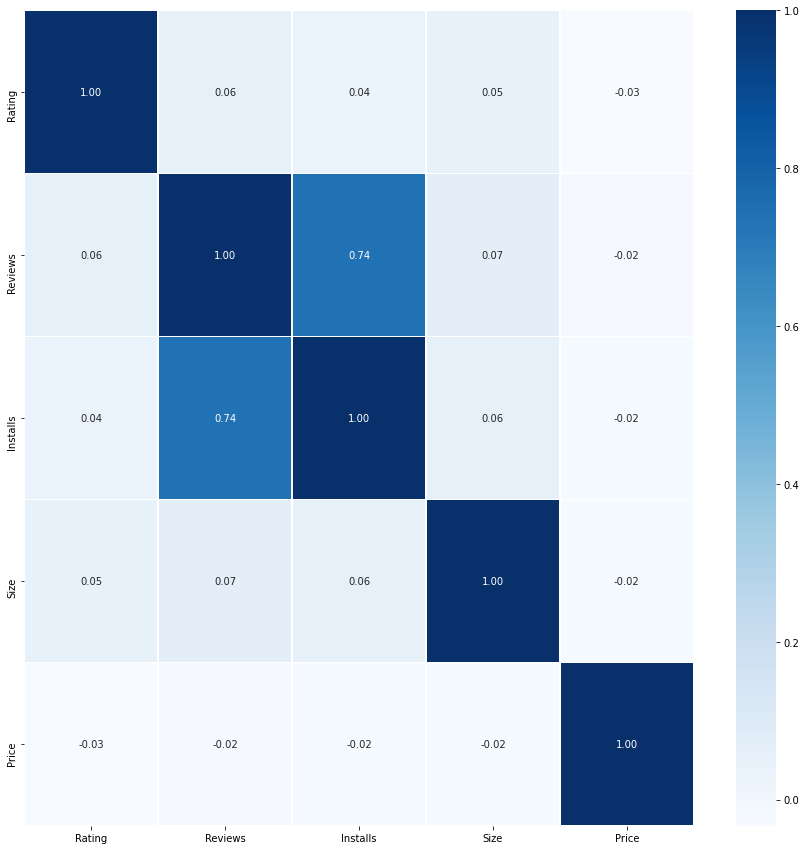

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 3-2 어플리케이션 추천
250번 (Five Nights at Freddy's 4), 532번 (PAW Patrol Pups to the Rescue), 1664번 (My Town : Farm)  어플을 사용하는 고객이 만족할 만한 어플을 추천해주는 전략을 구체적인 추천 목록과 함께 제시해주세요. 단, 이 고객의 잔여 용량은 500M(500,000k), 예산 범위는 20달러로 추천하는 어플들의 용량과 가격 총합이 제시된 제한 범위를 넘어서는 안 됩니다. / 고객이 만족할 만한 어플에 대한 기준은 자유롭게 설정하시고 그 근거를 설명해주시면 됩니다. (시각 자료 및 코드를 제외한 답안의 길이는 두 페이지 이내로 제한해주세요.)

In [8]:
import pandas as pd
import re
df2 = pd.read_csv("app_store.csv", encoding="utf-8-sig")

먼저 전체 데이터에서 250, 532, 1664번 데이터를 읽고 각각 비교해보자.

In [9]:
df2.loc[[250, 532, 1664], :]

,App Name,Category,Rating,Reviews,Installs,Size,Price
250,Five Nights at Freddy's 4,GAME_ACTION,4.591452,21782,"100,000+",45M,$2.99
532,PAW Patrol Pups to the Rescue,GAME_ADVENTURE,2.840887,1037,"100,000+",25M,$1.99
1664,My Town : Farm,GAME_EDUCATIONAL,4.139423,208,"10,000+",68M,$2.99


### 데이터 이해하기
각 데이터를 비교해보면 다음과 같은 사실을 알 수 있다.
- 각 어플리케이션은 모두 시리즈로 이루어져 있다.
- GAME 카테고리에 속해있다.
- 가격이 저렴하다.

각 어플리케이션이 모두 시리즈물이기 때문에, 각 시리즈의 대표작을 2개 씩 추천해주고자 한다. 앞서 상관관계를 분석한 결과 리뷰의 개수와 다운로드의 수가 비례하기 때문에 조금 더 구체적인 수치를 가진 리뷰 개수 데이터와 Rating 지표를 활용하고자 한다. 이때 하나의 수치가 아닌 두 수치를 혼합해서 섞은 이유는 다움과 같다.
- Review와 Install은 해당 어플리케이션을 얼마나 많은 사람들이 사용하는지를 나타내기 때문에 인기 지표로 볼 수 있다
- Rating은 사용자들의 만족도 지표라고 볼 수 있다.

많은 사람들이 높은 만족도를 보이는 어플리케이션이 전반적으로 평가가 좋은 어플리케이션이기 때문에 리뷰의 개수가 평균 리뷰 개수 보다 많은 어플리케이션 중에서 평점이 가장 높은 두 어플리케이션을 선정할 것이다.

### 데이터 실수화
분석에 앞서 다시 한 번 column의 정수 / 실수화를 진행해주자.

In [10]:
# Install 숫자로 변환
install_lst = df2["Installs"].to_list()
temp_lst = []
for install in install_lst:
  temp_lst.append(float(re.sub("[+,]", "", install)))
df2["Installs"] = temp_lst

# Size 숫자로 변환
size_lst = df2["Size"].to_list()
temp_lst = []
for size in size_lst:
  if "M" in size:
    temp_lst.append(float(re.sub("M", "", size)) * 10000)
  elif "k" in size:
    temp_lst.append(float(re.sub("[k, K]", "", size)) * 1000)
df2["Size"] = temp_lst

# Price 숫자로 변환
price_lst = df2["Price"].to_list()
temp_lst = []
for price in price_lst:
  temp_lst.append(float(re.sub("[$]", "", price)))
df2["Price"] = temp_lst
df2.head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price
0,123 Kids Fun MUSIC - Kids Music Educational Games,GAME_MUSIC,4.083333,36,1000.0,220000.0,1.99
1,LetterSchool - Block Letters,GAME_EDUCATIONAL,4.181092,751,10000.0,790000.0,6.99
2,Tynker for Schools,GAME_EDUCATIONAL,4.000000,33,1000.0,330000.0,4.99
3,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.500000,22,1000.0,440000.0,5.99
4,Toddler Sing and Play 2 Pro,GAME_MUSIC,4.065041,246,10000.0,200000.0,1.99
5,Letter Quiz: Alphabet Aquarium,EDUCATION,4.151515,66,5000.0,440000.0,1.99
6,Green Eggs and Ham - Dr. Seuss,BOOKS_AND_REFERENCE,4.656376,745,10000.0,140000.0,3.99
7,Meme Generator PRO,ENTERTAINMENT,4.630876,4042,100000.0,580000.0,2.99
8,Construction Simulator 2014,GAME_SIMULATION,4.339837,104091,1000000.0,190000.0,0.99
9,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.798857,13120,100000.0,430000.0,4.99


### Freddy 어플리케이션 추천 결과


In [11]:
freddy = df2[(df2["App Name"].str.contains("Freddy"))]
freddy = freddy[(freddy["Reviews"] > freddy["Reviews"].mean())]
freddy

,App Name,Category,Rating,Reviews,Installs,Size,Price
34,Five Nights at Freddy's,GAME_ACTION,4.575579,104679,1000000.0,500000.0,2.99
259,Five Nights at Freddy's 2,GAME_STRATEGY,4.620437,75687,500000.0,400000.0,2.99


### My Town 어플리케이션 추천 결과

In [12]:
farm = df2[(df2["App Name"].str.contains("My Town"))]
farm = farm[(farm["Reviews"] > farm["Reviews"].mean())]
farm

,App Name,Category,Rating,Reviews,Installs,Size,Price
1348,My Town : Wedding,GAME_EDUCATIONAL,4.216216,518,10000.0,660000.0,2.99
1662,My Town : School,GAME_EDUCATIONAL,4.290000,700,10000.0,640000.0,2.99


### PAW 어플리케이션 추천 결과

In [13]:
paw = df2[(df2["App Name"].str.contains("PAW"))]
paw = paw[(paw["Reviews"] > paw["Reviews"].mean())]
paw

,App Name,Category,Rating,Reviews,Installs,Size,Price
532,PAW Patrol Pups to the Rescue,GAME_ADVENTURE,2.840887,1037,100000.0,250000.0,1.99
536,PAW Patrol Air and Sea Adventures,GAME_EDUCATIONAL,3.863972,2029,100000.0,240000.0,3.99


자신이 플레이한 게임의 시리즈 이외에도 다른 게임을 추천받고 싶을 수 있다. 이를 위해 남은 금액으로 GAME 카테고리에서 가장 유명하면서 금액이 2 달러 이내인 게임을 추천해보자. 이번에는 데이터가 많으니 Reviews 평균이 아닌, 상위 25%를 기준으로 잡고 Rating이 가장 높은 어플리케이션을 구해보자.

In [15]:
new_df = pd.concat([freddy, farm, paw])
result = [new_df["Size"].sum(), new_df["Price"].sum()]
result

[2690000.0, 17.94]

In [31]:
game = df2[(df2["Category"].str.contains("GAME"))]
game_cheap = game[(game["Price"] < 2)]
game_cheap_popular = game_cheap[(game_cheap["Reviews"] > game_cheap["Reviews"].quantile(q=0.75, interpolation = "higher"))]
game_cheap_popular_max = game_cheap_popular[(game_cheap_popular["Rating"] == game_cheap_popular["Rating"].max())]
game_cheap_popular_max

,App Name,Category,Rating,Reviews,Installs,Size,Price
139,The Room Two,GAME_PUZZLE,4.871241,204024,1000000.0,220000.0,1.99


최종 추천 목록은 다음과 같다.

In [35]:
final_result = pd.concat([new_df, game_cheap_popular_max])["App Name"].to_list()
final_result

["Five Nights at Freddy's",
 "Five Nights at Freddy's 2",
 'My Town : Wedding',
 'My Town : School',
 'PAW Patrol Pups to the Rescue',
 'PAW Patrol Air and Sea Adventures',
 'The Room Two']